<a href="https://colab.research.google.com/github/Anusree-Dineshan/MINI_PROJECT/blob/main/braintumorMinipjct_acc98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import cv2
import pickle
import os
import matplotlib.pyplot as plt
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential

from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense

from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
# Loading Dataset
# initializing parameters req for the img dataset preprocessing

In [4]:
# Dimension of resized image
DEFAULT_IMAGE_SIZE = tuple((256, 256))

# Number of images used to train the model
#N_IMAGES = 

# Path to the dataset folder
TRAIN_DIR = '/content/drive/MyDrive/MINIPROJECT_DATASET/New_Datasets'


In [5]:
f = os.listdir(TRAIN_DIR)
print(f)
# datasets_brain_tumor = listdir(train_dir)
# print(datasets_brain_tumor)

['no', 'yes']


In [6]:
# convert images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, DEFAULT_IMAGE_SIZE)   
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [7]:
image_list, label_list = [], []
count=0
try:
    print("[INFO] Loading images ...")

    brain_tumor_folder_list = os.listdir(TRAIN_DIR)
#     print(brain_tumor_folder_list)

    for brain_tumor_folder in brain_tumor_folder_list:
        print(f"[INFO] Processing {brain_tumor_folder} ...")
        brain_tumor_image_list = os.listdir(f"{TRAIN_DIR}/{brain_tumor_folder}/")
#         print(brain_tumor_image_list)
#         print(brain_tumor_image_list[:N_IMAGES])
        
        for image in brain_tumor_image_list:
            image_directory = TRAIN_DIR+"/"+brain_tumor_folder+"/"+image
            #print(image_directory)
            count=count+1
            #if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True:
            image_list.append(convert_image_to_array(image_directory))
            label_list.append(brain_tumor_folder)

    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

# Transform the loaded training image data into numpy array
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

[INFO] Loading images ...
[INFO] Processing no ...
[INFO] Processing yes ...
[INFO] Image loading completed


In [8]:
# Check the number of images loaded for training
image_len = len(image_list)
print(f"Total number of images: {image_len}")

Total number of images: 3020


In [9]:
# Examine the labels/classes in the training dataset
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
# print(image_labels)

In [10]:
pickle.dump(label_binarizer,open('brain_tumor_label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)
print("Total number of classes: ", n_classes)

Total number of classes:  2


In [11]:
len(image_labels)

3020

In [12]:
print(label_binarizer.classes_)

['no' 'yes']


In [ ]:
# Using ImageDataGenerator to augment data by performing various operations on the training images.

augment = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                             height_shift_range=0.1, shear_range=0.2, 
                             zoom_range=0.2, horizontal_flip=True, 
                             fill_mode="nearest")

print(augment)

In [ ]:
# Splitting the data into training and test sets for validation purpose.

print("[INFO] Splitting data to train and test...")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Splitting data to train and test...


In [ ]:
x_train.shape,x_test.shape

((2416, 256, 256, 3), (604, 256, 256, 3))

In [ ]:
#Creating a sequential model and adding Convolutional, Normalization, Pooling, Dropout and Activation layers at the appropriate positions.

In [ ]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(256,256,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      3904      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      20752     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 16)        0

In [ ]:
# Train Model
model.compile(optimizer='adam',
                loss = tf.keras.losses.binary_crossentropy,
                metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=11,batch_size=256)

Epoch 1/11
10/10 [==============================] - 394s 38s/step - loss: 3.0332 - accuracy: 0.6076
Epoch 2/11
10/10 [==============================] - 389s 39s/step - loss: 0.5523 - accuracy: 0.7252
Epoch 3/11
10/10 [==============================] - 387s 39s/step - loss: 0.5029 - accuracy: 0.7446
Epoch 4/11
10/10 [==============================] - 391s 39s/step - loss: 0.4634 - accuracy: 0.7810
Epoch 5/11
10/10 [==============================] - 388s 39s/step - loss: 0.4207 - accuracy: 0.8038
Epoch 6/11
10/10 [==============================] - 392s 39s/step - loss: 0.3706 - accuracy: 0.8398
Epoch 7/11
10/10 [==============================] - 393s 39s/step - loss: 0.3101 - accuracy: 0.8704
Epoch 8/11
10/10 [==============================] - 392s 39s/step - loss: 0.2705 - accuracy: 0.8907
Epoch 9/11
10/10 [==============================] - 393s 39s/step - loss: 0.2259 - accuracy: 0.9094
Epoch 10/11
10/10 [==============================] - 393s 39s/step - loss: 0.1650 - accuracy: 0.9375

In [ ]:
model.save("/content/drive/MyDrive/mini_project/modelv1")

In [ ]:
model=tf.keras.models.load_model(
    "/content/drive/MyDrive/mini_project/modelv1"
)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
y_pred=model.predict(x_test)
y_p=[]
for i in y_pred:
    if(i>=0.5):
        y_p.append(1)
    else:
        y_p.append(0)

19/19 [==============================] - 23s 1s/step


In [ ]:
confusion=confusion_matrix(y_test,y_p)

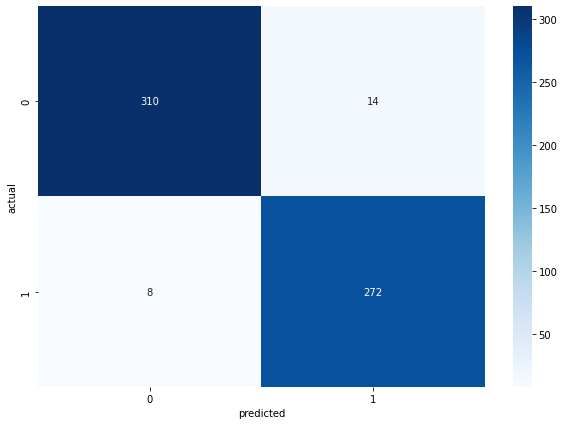

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion, annot=True,fmt='g',cmap='Blues')
plt.ylabel("actual")
plt.xlabel('predicted');

In [ ]:
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       324
           1       0.95      0.97      0.96       280

    accuracy                           0.96       604
   macro avg       0.96      0.96      0.96       604
weighted avg       0.96      0.96      0.96       604



In [ ]:
model.evaluate(x_train,y_train)

76/76 [==============================] - 88s 1s/step - loss: 0.0846 - accuracy: 0.9810


[0.08458106219768524, 0.9809602499008179]

In [13]:
!pip install gradio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 24.5 MB/s 
     |████████████████████████████████| 55 kB 4.2 MB/s 
     |████████████████████████████████| 2.3 MB 56.9 MB/s 
     |████████████████████████████████| 54 kB 3.6 MB/s 
     |████████████████████████████████| 272 kB 69.1 MB/s 
     |████████████████████████████████| 84 kB 4.3 MB/s 
     |████████████████████████████████| 106 kB 78.2 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 84 kB 4.4 MB/s 
     |████████████████████████████████| 213 kB 100.2 MB/s 
     |████████████████████████████████| 64 kB 2.8 MB/s 
     |████████████████████████████████| 80 kB 11.9 MB/s 
     |████████████████████████████████| 68 kB 8.4 MB/s 
     |████████████████████████████████| 46 kB 4.5 MB/s 
     |████████████████████████████████| 4.1 MB 60.8 MB/s 
     |████████████████████████████████| 593 kB

In [14]:
!pip install --upgrade fastai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import gradio as gr
import tensorflow as tf 
import numpy as np
import requests
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model

In [16]:
model=tf.keras.models.load_model(
    "/content/drive/MyDrive/mini_project/modelv1"
)

In [17]:
class_names=["no","yes"]

In [18]:
def predict_image(img):
  img_3d=img.reshape(-1,256,256,3)
  img_resize=img_3d
  prediction=model.predict(img_resize)
  print(prediction)
  print(img_3d)
  if(prediction[0]>0.4):
    return "yes"
  else:
    return "no"

In [20]:
image=gr.inputs.Image(shape=(256,256))

label=gr.outputs.Label(num_top_classes=2)

gr.Interface(fn=predict_image, inputs=image, outputs='label',interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().

Using Embedded Colab Mode (NEW). If you have issues, please use share=True and file an issue at https://github.com/gradio-app/gradio/
Note: opening the browser inspector may crash Embedded Colab Mode.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 56ms/step
[[1.0888185e-25]]
[[[[ 26  26  26]
   [ 38  38  38]
   [ 37  37  37]
   ...
   [199 199 199]
   [255 255 255]
   [250 250 250]]

  [[ 27  27  27]
   [ 39  39  39]
   [ 37  37  37]
   ...
   [199 199 199]
   [255 255 255]
   [250 250 250]]

  [[ 23  23  23]
   [ 31  31  31]
   [ 41  41  41]
   ...
   [199 199 199]
   [255 255 255]
   [250 250 250]]

  ...

  [[ 26  26  26]
   [ 37  37  37]
   [ 36  36  36]
   ...
   [199 199 199]
   [255 255 255]
   [250 250 250]]

  [[ 26  26  26]
   [ 37  37  37]
   [ 36  36  36]
   ...
   [199 199 199]
   [255 255 255]
   [250 250 250]]

  [[ 26  26  26]
   [ 37  37  37]
   [ 36  36  36]
   ...
   [199 199 199]
   [255 255 255]
   [250 250 250]]]]
1/1 [==============================] - 0s 99ms/step
[[1.2092483e-22]]
[[[[1 1 1]
   [1 1 1]
   [1 1 1]
   ...
   [1 1 1]
   [1 1 1]
   [1 1 1]]

  [[1 1 1]
   [1 1 1]
   [1 1 1]
   ...
   [1 1 1]
   [1 1 1]
   [1 1 1]]

  [[1 1 1]
   [1 1 1]
   [1 1 1]
   

(<gradio.routes.App at 0x7fd77dba4ad0>, 'http://127.0.0.1:7860/', None)

In [ ]:
yyy=model.predict(x_test[1:3])
yyy

1/1 [==============================] - 0s 225ms/step


array([[0.44469815],
       [0.37442896]], dtype=float32)

In [ ]:
x_test[0]

array([[[0.5864  , 0.5864  , 0.5864  ],
        [0.582   , 0.582   , 0.582   ],
        [0.56    , 0.56    , 0.56    ],
        ...,
        [0.5645  , 0.5645  , 0.5645  ],
        [0.582   , 0.582   , 0.582   ],
        [0.582   , 0.582   , 0.582   ]],

       [[0.0711  , 0.0711  , 0.0711  ],
        [0.004444, 0.004444, 0.004444],
        [0.00889 , 0.00889 , 0.00889 ],
        ...,
        [0.00889 , 0.00889 , 0.00889 ],
        [0.004444, 0.004444, 0.004444],
        [0.06665 , 0.06665 , 0.06665 ]],

       [[0.0933  , 0.0933  , 0.0933  ],
        [0.00889 , 0.00889 , 0.00889 ],
        [0.00889 , 0.00889 , 0.00889 ],
        ...,
        [0.00889 , 0.00889 , 0.00889 ],
        [0.00889 , 0.00889 , 0.00889 ],
        [0.08887 , 0.08887 , 0.08887 ]],

       ...,

       [[0.07556 , 0.07556 , 0.07556 ],
        [0.004444, 0.004444, 0.004444],
        [0.00889 , 0.00889 , 0.00889 ],
        ...,
        [0.004444, 0.004444, 0.004444],
        [0.004444, 0.004444, 0.004444],
        [